# New Section

2481it [00:14, 169.29it/s]


X_Train.shape: (2481, 64, 64, 3)
X_test.shape (745, 64, 64, 3)
y_train.shape (1736, 2)
y_test.shape (745, 2)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 3)         84        
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_16 (Ba  (None, 2048)              8192      
 tchNormalizatio

<ipython-input-3-8a513f016508>:131: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


27/27 [==============================] - ETA: 0s - loss: 0.9870 - accuracy: 0.5251
Epoch 1: val_loss improved from inf to 1324989312.00000, saving model to Xception_Model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 249s 8s/step - loss: 0.9870 - accuracy: 0.5251 - val_loss: 1324989312.0000 - val_accuracy: 0.5101 - lr: 0.0100
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.7689 - accuracy: 0.5269
Epoch 2: val_loss improved from 1324989312.00000 to 37116.05859, saving model to Xception_Model.hdf5
27/27 [==============================] - 237s 9s/step - loss: 0.7689 - accuracy: 0.5269 - val_loss: 37116.0586 - val_accuracy: 0.4899 - lr: 0.0100
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.7894 - accuracy: 0.5036
Epoch 3: val_loss improved from 37116.05859 to 2836.63965, saving model to Xception_Model.hdf5
27/27 [==============================] - 231s 9s/step - loss: 0.7894 - accuracy: 0.5036 - val_loss: 2836.6396 - val_accuracy: 0.4899 - lr: 0.0100
Epoch 4/30
27/27 [==============================] - ETA: 0s - loss: 0.8247 - accuracy: 0.5138
Epoch 4: val_loss did not improve from 2836.63965
27/27 [====================

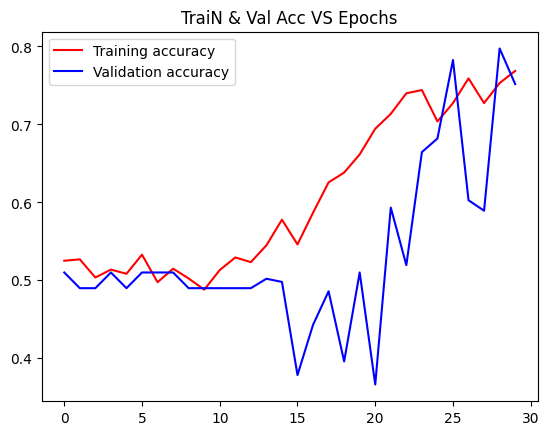

<Figure size 640x480 with 0 Axes>

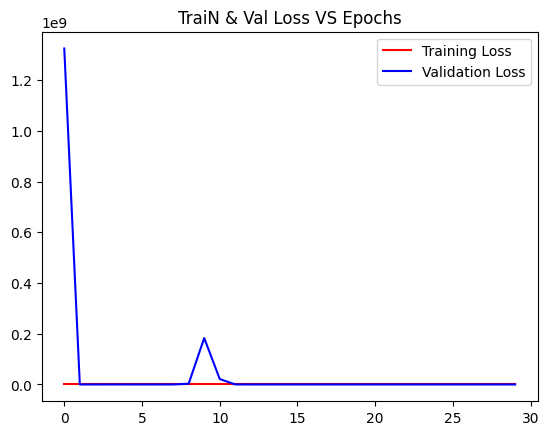

<Figure size 640x480 with 0 Axes>

24/24 [==============================] - 14s 574ms/step - loss: 0.4121 - accuracy: 0.7973
Test Loss: 0.4121474623680115
Test accuracy: 79.73154187202454
24/24 [==============================] - 15s 512ms/step
Test accuracy: 79.73154187202454
Confusion Score = [[280 100]
 [ 51 314]]
Precision = 0.7584541062801933
Recall = 0.8602739726027397
F1 Score = 0.8061617458279846


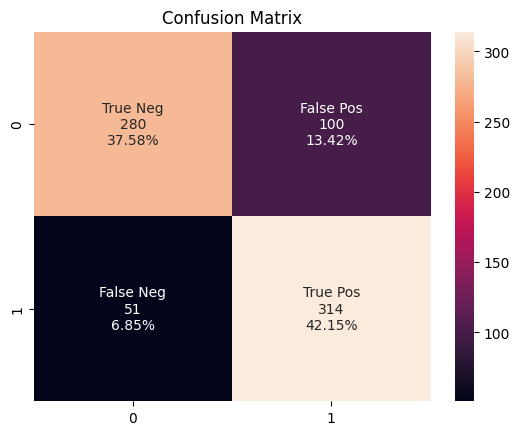

In [3]:
#Import Necessary Libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import Xception
#from keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
#import keras_preprocessing
!pip install Keras-Preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


#Split Into Train Data & Test Data

disease_types=['COVID', 'non-COVID']
data_dir = '/home'
train_dir = os.path.join(data_dir)
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X_Train = X_train / 255.
print('X_Train.shape:',X_Train.shape)


Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_train, test_size=0.3)

print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.3)


#Define Xception Model Architecture
BATCH_SIZE = 64
EPOCHS = 30
SIZE=64
N_ch=3
#learning_rate = 0.01

def build_Xception():
    xception = Xception(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = xception(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)

    # model
    model = Model(input,output)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


    #decay_rate = learning_rate / EPOCHS
    #optimizer = tf.keras.optimizers.Adam(lr=learning_rate, decay=decay_rate)

    #optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model


#Train the Model
model = build_Xception()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('Xception_Model.hdf5', verbose=1, save_best_only=True)
datagen = ImageDataGenerator(rotation_range=360,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True)
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))



#Plot the Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()


epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()


model.load_weights("Xception_Model.hdf5")
score = model.evaluate(X_val, Y_val ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)


Y_pred = model.predict(X_val)
Y_predx = np.argmax(Y_pred, axis = -1)
Y_valx = np.argmax(Y_val, axis = -1)
cf_matrix = confusion_matrix(Y_valx, Y_predx)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '')
plt.title("Confusion Matrix")

cfmatrix = confusion_matrix(Y_valx, Y_predx)
precision = precision_score(Y_valx, Y_predx)
recall = recall_score(Y_valx, Y_predx)
f1score = f1_score(Y_valx, Y_predx)

print('Test accuracy:', score[1]*100)
print(f"Confusion Score = {cfmatrix}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")
